##### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore');

##### Importing Dataset

In [2]:
dataset=pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
dataset.shape

(400, 5)

In [5]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [6]:
dataset.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

##### Extracting  Variables

In [10]:
X = dataset.iloc[:,[2,3]].values
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [11]:
Y = dataset.iloc[:,4].values
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

##### Heatmap to see correlation

<AxesSubplot:>

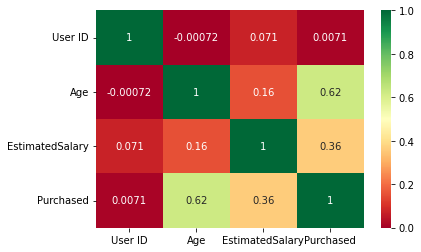

In [8]:
sns.heatmap(dataset.corr(), annot = True, cmap = 'RdYlGn')

##### Train Test Split

In [13]:
X_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=1/3,random_state=32)

##### Feature Scaling

In [15]:
standard_Scaler=StandardScaler()
X_train = standard_Scaler.fit_transform(X_train)
x_test = standard_Scaler.transform(x_test)

In [16]:
x_test

array([[ 2.2508008 ,  0.96423267],
       [-1.3224201 ,  0.57131297],
       [-1.02465169,  0.78288512],
       [ 2.05228853, -0.69811991],
       [ 0.96047103,  2.23366555],
       [ 0.06716581,  0.29929164],
       [-0.32985874, -1.36306094],
       [ 0.96047103,  1.05490645],
       [ 1.95303239, -1.1212642 ],
       [-0.82613942, -0.27497561],
       [ 0.86121489, -1.45373471],
       [-1.71944464,  0.11794409],
       [ 2.05228853, -0.97014124],
       [-1.81870078, -0.00295428],
       [-1.42167623, -0.66789531],
       [ 0.26567808, -0.3354248 ],
       [-1.02465169, -0.36564939],
       [-0.13134647,  2.23366555],
       [-1.12390783, -1.60485767],
       [ 1.85377625,  1.02468185],
       [ 1.45675171, -1.48395931],
       [-0.52837101, -1.57463308],
       [ 1.1589833 ,  2.14299177],
       [ 1.25823944,  0.54108838],
       [ 0.36493421,  0.0574949 ],
       [ 0.96047103, -0.81901828],
       [-0.2306026 , -1.36306094],
       [-0.32985874, -0.81901828],
       [ 1.1589833 ,

##### Instantiating and fitting the model to training Dataset

In [17]:
log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

##### Prediction for Test Dataset

In [25]:
y_test_pred=log_reg.predict(x_test)
y_test_pred

y_train_pred=log_reg.predict(X_train)
y_train_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1], dtype=int64)

In [20]:
y_test

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0], dtype=int64)

##### Visualizing the Training Set Result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


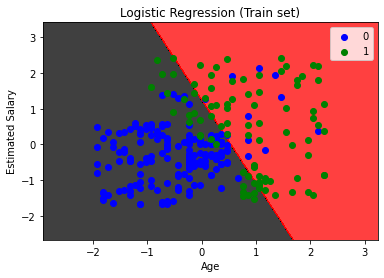

In [21]:
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min() - 1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,log_reg.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                        alpha=0.75,cmap=ListedColormap(('black','red')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1],
               c=ListedColormap(['blue','green'])(i),label=j)

plt.title('Logistic Regression (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

##### Visualizing the Testing Set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


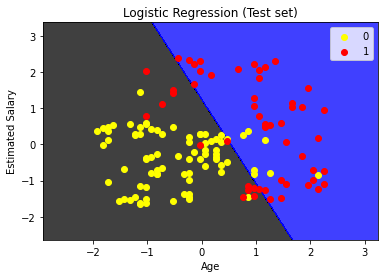

In [22]:
X_set,y_set = x_test,y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min() - 1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,log_reg.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                        alpha=0.75,cmap=ListedColormap(('black','blue')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1],
               c=ListedColormap(['yellow','red'])(i),label=j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

##### Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[74,  7],
       [13, 40]], dtype=int64)

In [27]:

print("Accuracy: ", metrics.accuracy_score(y_train,y_train_pred))
print("Accuracy: ", metrics.accuracy_score(y_test,y_test_pred))

Accuracy:  0.849624060150376
Accuracy:  0.8507462686567164


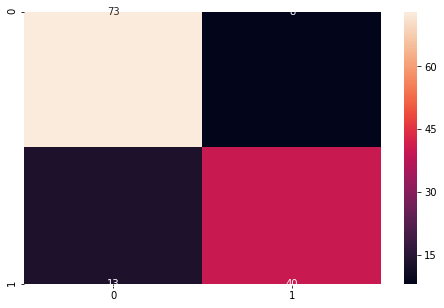

In [15]:
import seaborn as sns
fig, ax. = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, ax=ax)


In [20]:
# fig, ax = plt.subplots()
# sns.heatmap(ax=ax)

##### Accuracy

In [21]:
accuracy = (73+40)/len(y_test)
accuracy

0.8432835820895522

##### Mis Classification Rate

In [22]:
mis_cla_rate  = (13+8)/len(y_test)
mis_cla_rate

0.15671641791044777

##### Accuracy, Precision, Recall etc

In [23]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.8432835820895522


In [24]:
print("Precision: ", metrics.precision_score(y_test,y_pred))

Precision:  0.8333333333333334


In [25]:
print("Recall: ", metrics.recall_score(y_test,y_pred))

Recall:  0.7547169811320755


##### ROC and AUC

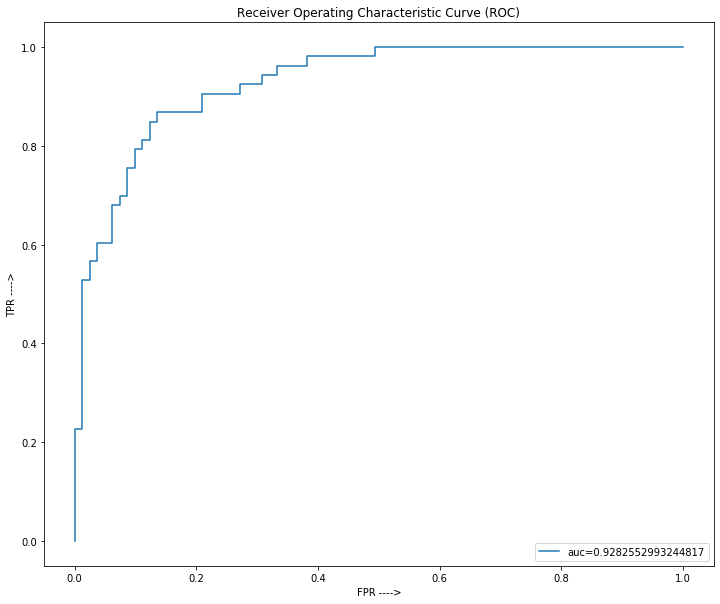

In [26]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()